# Practice Problem: HR Analytics

## Business objective
    Use historical data to predict the employees most likely to get promoted.
    
## Current solutions
    They first identify a set of employees based on recommendations/ past performance Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
 

## Framing this problem (supervised/unsupervised, online/offline, batch/online)
    Supervised learning. The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features.
    Classification task  labels are binary variable: 1 (will get promoted), 0 (will have difficulty to get promoted).
    
## Performance be measured
    Options available to measure the performance
        1. measuring accuracy using cross validation
        2. Confusion matrix
        3. Precision and recall
        4. ROC Curve
    
## Data Gathering
    The collection of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR.

In [1]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns

# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# display plots on the notebook itself
%matplotlib inline

# using operating system dependent functionality
import os
from scipy import stats

# Reading the data files

In [2]:
path = r"C:\Users\krish\Downloads\proj"
os.chdir(path)
os.getcwd()
os.listdir()

['EDA',
 'Final presentation',
 'Model Building',
 'ReadMe.txt',
 'test.csv',
 'train.csv',
 'wns_hack_im_1.jpg']

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# Checking the target label spread

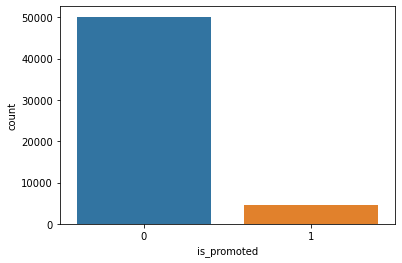

In [6]:
sns.countplot(train['is_promoted'])

In [7]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

# this is clearly imbalanced data

In [8]:
# lets check them in percent
train['is_promoted'].value_counts()/len(train)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

# glimpse of train

In [9]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Dropping unnecessary variables

In [10]:
train = train.drop('employee_id', axis = 1)

# Creating test set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_set, test_set = train_test_split(train, test_size = 0.2, random_state = 42)

In [13]:
print(train_set.shape, test_set.shape)

(43846, 13) (10962, 13)


# To discover visual insights: EDA

# Preparing for ML algorithms

In [14]:
train = train_set.drop("is_promoted", axis=1)
train_labels = train_set["is_promoted"].copy()

In [15]:
print(train.shape, train_labels.shape)

(43846, 12) (43846,)


# Data cleaning

# Missing values

In [16]:
def miss_cal(data):
    return(data.isnull().sum()/len(data)*100)

In [17]:
miss_cal(train)

department              0.000000
region                  0.000000
education               4.445103
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.533184
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [18]:
num_attribs = list(train.select_dtypes(exclude=['object']).columns)
cat_attribs = list(train.select_dtypes('object').columns)

In [19]:
print(num_attribs)
print(cat_attribs)

['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
['department', 'region', 'education', 'gender', 'recruitment_channel']


In [20]:
train.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

# Encoding

In [21]:
train = pd.get_dummies(train, columns=cat_attribs)
train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
3872,1,31,5.0,5,1,0,48,0,0,0,...,0,0,1,0,0,0,1,1,0,0
11619,1,34,1.0,4,0,0,78,0,0,0,...,0,0,0,0,1,0,1,0,0,1
36178,3,29,4.0,4,1,0,77,0,0,0,...,0,0,1,0,0,0,1,1,0,0
29884,1,54,4.0,15,1,0,47,0,0,0,...,0,0,0,0,1,0,1,1,0,0
22968,1,31,5.0,6,0,0,86,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [22]:
num_attribs = list(train.select_dtypes(exclude=['object']).columns)
cat_attribs = list(train.select_dtypes('object').columns)

In [23]:
print(num_attribs)
print(cat_attribs)

['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'department_Analytics', 'department_Finance', 'department_HR', 'department_Legal', 'department_Operations', 'department_Procurement', 'department_R&D', 'department_Sales & Marketing', 'department_Technology', 'region_region_1', 'region_region_10', 'region_region_11', 'region_region_12', 'region_region_13', 'region_region_14', 'region_region_15', 'region_region_16', 'region_region_17', 'region_region_18', 'region_region_19', 'region_region_2', 'region_region_20', 'region_region_21', 'region_region_22', 'region_region_23', 'region_region_24', 'region_region_25', 'region_region_26', 'region_region_27', 'region_region_28', 'region_region_29', 'region_region_3', 'region_region_30', 'region_region_31', 'region_region_32', 'region_region_33', 'region_region_34', 'region_region_4', 'region_region_5', 'region_region_6', 'region_region_7', 'region_region_8', 'region_regio

# Filling missing values with median and Feature scaling numerical variables

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [25]:
train_tidy = num_pipeline.fit_transform(train[num_attribs])
train_tidy = pd.DataFrame(train_tidy, columns=num_attribs)
train_tidy.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.417288,-0.495445,1.396339,-0.204244,1.354754,-0.154483,-1.150578,-0.326893,-0.22192,-0.213473,...,-0.108805,-0.089055,0.702890,-0.121708,-0.610683,-0.650256,0.650256,0.896366,-0.145828,-0.859183
1,-0.417288,-0.105468,-1.896152,-0.437904,-0.738141,-0.154483,1.095756,-0.326893,-0.22192,-0.213473,...,-0.108805,-0.089055,-1.422698,-0.121708,1.637512,-0.650256,0.650256,-1.115616,-0.145828,1.163896
2,2.855770,-0.755429,0.573216,-0.437904,1.354754,-0.154483,1.020878,-0.326893,-0.22192,-0.213473,...,-0.108805,-0.089055,0.702890,-0.121708,-0.610683,-0.650256,0.650256,0.896366,-0.145828,-0.859183
3,-0.417288,2.494377,0.573216,2.132359,1.354754,-0.154483,-1.225456,-0.326893,-0.22192,-0.213473,...,-0.108805,-0.089055,-1.422698,-0.121708,1.637512,-0.650256,0.650256,0.896366,-0.145828,-0.859183
4,-0.417288,-0.495445,1.396339,0.029417,-0.738141,-0.154483,1.694779,-0.326893,-0.22192,-0.213473,...,-0.108805,-0.089055,0.702890,-0.121708,-0.610683,-0.650256,0.650256,-1.115616,-0.145828,1.163896


# variable reduction using random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf=RandomForestClassifier()
rf.fit(train_tidy, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
feature_imp=pd.DataFrame(list(zip(train_tidy.columns, rf.feature_importances_)), columns=['var', 'imp'])
# feature_imp

In [30]:
feature_imp['flag']=np.where(feature_imp['imp']<0.01, 0,1)

In [31]:
feature_imp['flag'].value_counts()

0    41
1    17
Name: flag, dtype: int64

In [32]:
feature_imp1=feature_imp[feature_imp['flag']==1]

In [33]:
x=train_tidy[feature_imp1['var']]
x.shape

(43846, 17)

# T. training multiple classifiers

### T.1. Stochastic Gradient Descent

In [34]:
from sklearn.linear_model import SGDClassifier

In [35]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x, train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
sgd_clf.score(x, train_labels)

0.921726041144004

# T.2. naive bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
gb=GaussianNB()
gb.fit(x, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
gb.score(x, train_labels)

0.9112347762623728

# P. Performance Measures

# P.1. Confusion Matrix

In [40]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [41]:
y_train_pred = cross_val_predict(sgd_clf, x, train_labels, cv=3)

In [42]:
confusion_matrix(train_labels, y_train_pred)

array([[39904,   182],
       [ 3236,   524]], dtype=int64)

# P.2. Precision and Recall

In [43]:
from sklearn.metrics import precision_score, recall_score

In [44]:
precision_score(train_labels, y_train_pred) 

0.7422096317280453

In [45]:
recall_score(train_labels, y_train_pred) 

0.13936170212765958

### Now model does not look as shiny as it did when we looked at its accuracy